In [2]:
import random
from matplotlib import pyplot as plt
import numpy as np

In [88]:
def get_distance(point_1, point_2):
    return ((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2) ** 0.5


def get_labels(data, centroids):
    labels = []
    for point in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = get_distance(point, centroid)
            if min_dist > new_dist:
                min_dist = new_dist
                lable = i
        labels.append(lable)
    return labels


def update_centroids(data, labels, k):
    label_counts = [0] * len(labels)
    new_centroids = [[0, 0] for i in range(k)]
    for label, point in zip(labels, data):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        label_counts[label] += 1

    for i, (x, y) in enumerate(new_centroids):
        new_centroids[i] = [x / label_counts[i], y / label_counts[i]]
    return new_centroids


def initialize_centroids(data, k):

    def random_uniform(low, high):
        return low + (high - low) * random.random()

    x_min = min(point[0] for point in data)
    x_max = max(point[0] for point in data)
    y_min = min(point[1] for point in data)
    y_max = max(point[1] for point in data)

    centroids = []
    for i in range(k):
        centroids.append([random_uniform(x_min, x_max),
                          random_uniform(y_min, y_max)])
    return centroids


def initialize_centroids_bad(x, k):
    return x[:k]


def should_stop(old_centroids, new_centroids, threshold=1e-12):
    total_distance = 0
    for old_point, new_point in zip(old_centroids, new_centroids):
        total_distance += get_distance(old_point, new_point)
    return total_distance > threshold


def kmeans(data, k):
    centroids = initialize_centroids(data, k)
    iterations = 0
    while True:
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = update_centroids(data, labels, k)        
        iterations += 1
        if should_stop(old_centroids, centroids):
            break
    return labels, centroids


In [4]:
data = np.array([[random.random(), random.random()] for _ in range(200)])
x = data[:, 0]
y = data[:, 1]

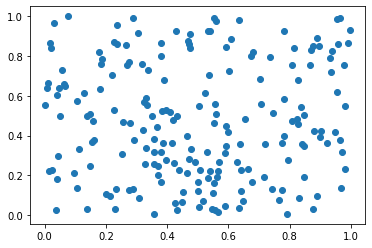

In [5]:
plt.scatter(x, y)

In [6]:
k = 3
labels, centroids = kmeans(data, k)
labels, centroids = np.array(labels), np.array(centroids)

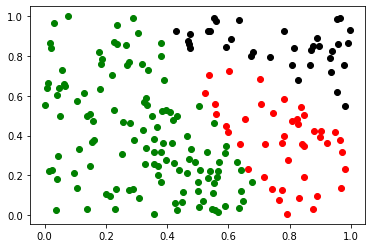

In [7]:
for label, c in zip(range(k), ['r', 'g', 'k']):
    plt.scatter(x[labels == label], y[labels == label], c=c)

In [24]:
x_0 = np.random.normal(0, 1, 500)
y_0 = np.random.normal(1, 1, 500)

x_1 = np.random.normal(5, 0.5, 50)
y_1 = np.random.normal(8, 0.5, 50)

x_2 = np.random.normal(10, 0.5, 50)
y_2 = np.random.normal(1, 0.5, 50)

x = np.hstack([x_0, x_1, x_2])
y = np.hstack([y_0, y_1, y_2])
data = np.vstack([x, y]).T

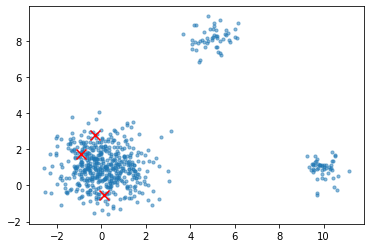

In [39]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=10)
plt.scatter(data[:3, 0], data[:3, 1], marker='x', s=100, c='r')

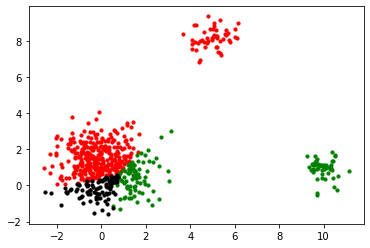

In [98]:
k = 3
labels, centroids = kmeans(data, k)
labels, centroids = np.array(labels), np.array(centroids)
for label, c in zip(range(k), ['r', 'g', 'k']):
    plt.scatter(x[labels == label], y[labels == label], c=c, s=10)

In [55]:
np.random.uniform(-2, 10, 3)

array([1.60474085, 3.03689931, 7.03651907])

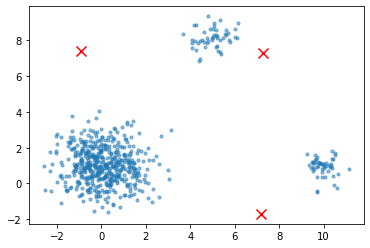

In [102]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=10)
plt.scatter(np.random.uniform(-2, 10, 3),
            np.random.uniform(-2, 10, 3),
            marker='x', s=100, c='r')

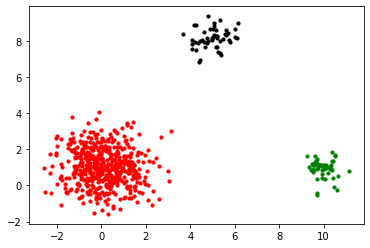

In [94]:
k = 3
labels, centroids = kmeans(data, k)
labels, centroids = np.array(labels), np.array(centroids)
for label, c in zip(range(k), ['r', 'g', 'k']):
    plt.scatter(x[labels == label], y[labels == label], c=c, s=10)